In [5]:
from sklearn.datasets import fetch_california_housing
import math, copy
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from lab_utils_uni import plt_intuition, plt_stationary, plt_update_onclick, soup_bowl
import time
plt.style.use('./deeplearning.mplstyle')

Bad value in file './deeplearning.mplstyle', line 6 ('axes.edgecolor : #4f4f4f'): Key axes.edgecolor: '' does not look like a color arg
Bad value in file './deeplearning.mplstyle', line 7 ('axes.labelcolor : #4f4f4f'): Key axes.labelcolor: '' does not look like a color arg
Bad value in file './deeplearning.mplstyle', line 17 ('xtick.color : #4f4f4f'): Key xtick.color: '' does not look like a color arg
Bad value in file './deeplearning.mplstyle', line 19 ('ytick.color : #4f4f4f'): Key ytick.color: '' does not look like a color arg


In [31]:
def predict(x, w, b): 
    """
    single predict using linear regression
    Args:
      x (ndarray): Shape (n,) example with multiple features
      w (ndarray): Shape (n,) model parameters   
      b (scalar):             model parameter 
      
    Returns:
      p (scalar):  prediction
    """
    p = np.dot(x, w) + b     
    return p  


def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar    
    return cost


def compute_cost_vectorized(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
    Returns:
      cost (scalar): cost
    """
    m = X.shape[0]
    f_wb = np.dot(X, w) + b
    err = f_wb - y
    cost = np.sum(err**2) / (2 * m)
    return cost



def compute_gradient(X, y, w, b): 
    m, n = X.shape          
    dj_dw = np.zeros((n,))  
    dj_db = 0.               
    for i in range(m):                             # Loop pelos exemplos de treino
        # 1. Calcula o erro da previsão para este exemplo
        # f_wb é o "palpite" do modelo (combinação de todos os x com os w)
        err = (np.dot(X[i], w) + b) - y[i]   
        # 2. Calcula o impacto desse erro em cada peso w_j
        for j in range(n):                         # Loop pelas características
            dj_dw[j] = dj_dw[j] + err * X[i, j]    # Multiplica erro pela característica j
            
        # 3. O erro de b não depende de nenhuma característica x
        dj_db = dj_db + err                        
    # No final, divide pela média (m)
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw


def compute_gradient_vectorized(X, y, w, b):
    m, n = X.shape
    
    # 1. Calcula o erro para todas as linhas de uma vez (vetor de tamanho m)
    f_wb = X @ w + b
    err = f_wb - y
    
    # 2. Calcula o gradiente de w (vetor de tamanho n)
    # Multiplica a transposta de X pelo erro e divide por m
    dj_dw = (1/m) * (X.T @ err)
    
    # 3. Calcula o gradiente de b (escalar)
    dj_db = np.sum(err) / m
    
    return dj_db, dj_dw

    
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 


    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w, b)
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        if i < 100000:      
            J_history.append(cost_function(X, y, w, b))
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")
        
    return w, b, J_history

def plot_housing_data_multiple(X, y, w, b, feature_names):
    """
    Plota cada característica contra o preço e mostra a previsão do modelo.
    X: matriz de características (m, n)
    y: vetor de alvos (m,)
    w: pesos finais (n,)
    b: viés final
    feature_names: lista com os nomes das colunas (ex: ['Renda', 'Idade', ...])
    """
    m, n = X.shape
    fig, ax = plt.subplots(1, n, figsize=(min(n*5, 20), 5), sharey=True)
    
    # Previsão global do modelo para calcular os erros/linhas
    # (ou apenas simplificar para mostrar a tendência em cada gráfico)
    for i in range(n):
        ax[i].scatter(X[:, i], y, marker='x', c='r', alpha=0.5, label='Real')
        
        # Para visualização, plotamos o impacto individual da feature
        # mantendo as outras em sua média, ou simplesmente a linha de tendência
        x_min, x_max = np.min(X[:, i]), np.max(X[:, i])
        # Aqui plotamos uma estimativa simplificada da influência dessa feature
        y_line_min = w[i] * x_min + b
        y_line_max = w[i] * x_max + b
        
        ax[i].plot([x_min, x_max], [y_line_min, y_line_max], c='b', label='Tendência')
        ax[i].set_xlabel(feature_names[i])
        if i == 0:
            ax[i].set_ylabel('Preço')
        ax[i].legend()
    plt.suptitle("Previsão de Preços por Característica")
    plt.tight_layout()
    plt.show()
def plot_residuals_multiple(X, y, w, b):
    # f_wb = X.w + b
    f_wb = np.dot(X, w) + b
    errors = f_wb - y
    
    plt.figure(figsize=(10,4))
    plt.scatter(range(len(errors)), errors, marker='o', c='g', alpha=0.4)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.title("Resíduos do Modelo Múltiplo (Erro por Exemplo)")
    plt.xlabel("Índice do Exemplo")
    plt.ylabel("Erro")
    plt.show()

def plot_learning_curve(J_history):
    """
    Plota a evolução do custo com zoom no final para ver a convergência.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    
    # Gráfico 1: Curva Completa
    ax1.plot(J_history, c='orange')
    ax1.set_title("Curva Completa")
    ax1.set_xlabel("Iterações")
    ax1.set_ylabel("Custo (J)")
    
    # Gráfico 2: Final da Curva (Zoom)
    # Mostra apenas os últimos 20% das iterações ou as iterações após a 100
    zoom_start = len(J_history) // 2
    ax2.plot(range(zoom_start, len(J_history)), J_history[zoom_start:], c='orange')
    ax2.set_title("Fim da Curva (Zoom)")
    ax2.set_xlabel("Iterações")
    ax2.set_ylabel("Custo (J)")
    
    plt.tight_layout()
    plt.show()

def zscore_normalize_features(X):
    # Calcula a média e o desvio padrão de cada coluna (axis=0)
    mu     = np.mean(X, axis=0)
    sigma  = np.std(X, axis=0)
    # Aplica a fórmula: (x - media) / desvio
    X_norm = (X - mu) / sigma      
    return X_norm, mu, sigma

Tamanho dos dados de treinamento: (20640, 8)
Gradient descent com vetorização
Iteration    0: Cost     2.80
Iteration 1200: Cost     0.60
Iteration 2400: Cost     0.34
Iteration 3600: Cost     0.31
Iteration 4800: Cost     0.30
Iteration 6000: Cost     0.29
Iteration 7200: Cost     0.29
Iteration 8400: Cost     0.28
Iteration 9600: Cost     0.28
Iteration 10800: Cost     0.28
[FOR LOOP] Tempo: 1.4897 segundos
b,w found by gradient descent: 2.07,[ 0.81958909  0.17372801 -0.14003347  0.15497857  0.01551959 -0.04373537
 -0.50719176 -0.47151509] 
prediction: 4.13, target value: 4.526
prediction: 3.90, target value: 3.585
prediction: 3.77, target value: 3.521
prediction: 3.22, target value: 3.413
prediction: 2.42, target value: 3.422
prediction: 2.60, target value: 2.697
prediction: 2.39, target value: 2.992
prediction: 2.20, target value: 2.414
prediction: 1.66, target value: 2.267
prediction: 2.42, target value: 2.611
prediction: 2.20, target value: 2.815
prediction: 2.26, target value: 2

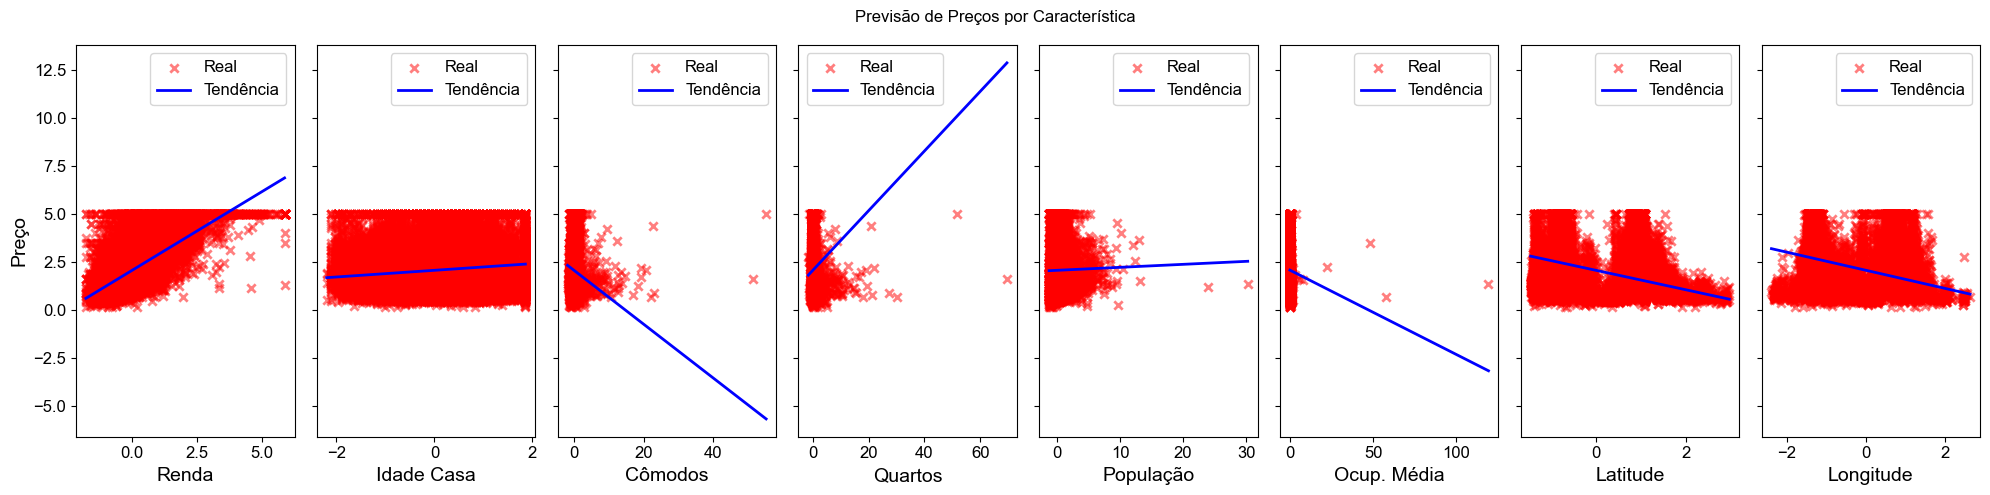

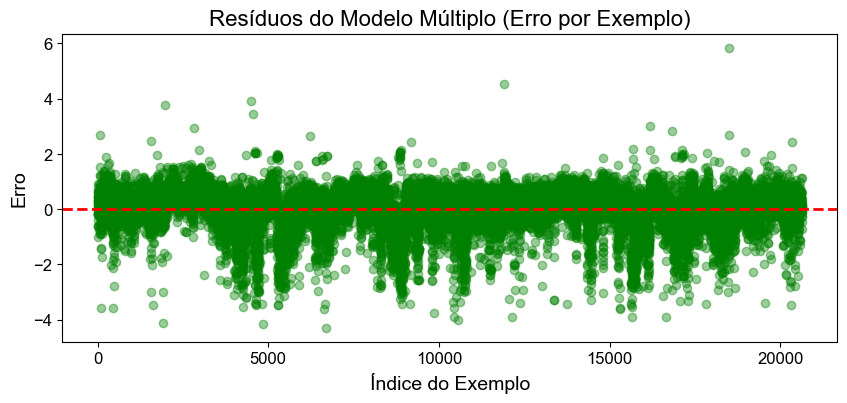

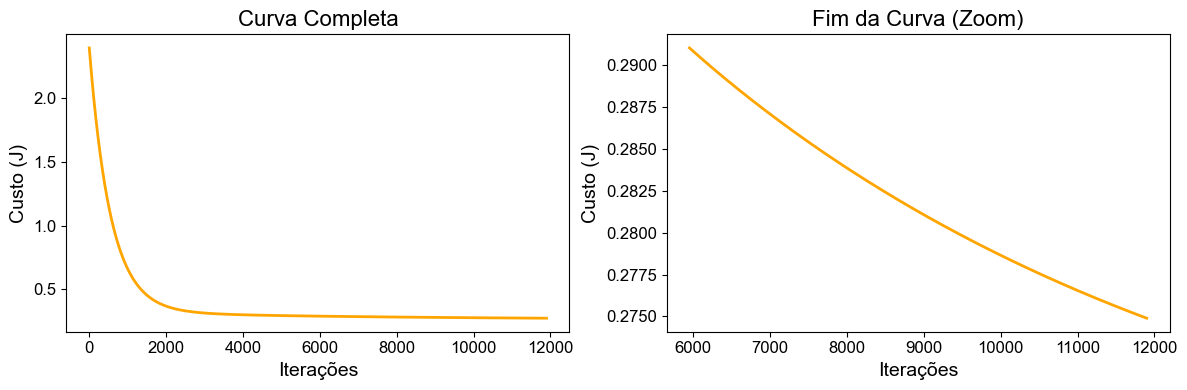

In [46]:
housing = fetch_california_housing()
x_train = housing.data[:, :] # Pega todas as 8 features
y_train = housing.target
print(f"Tamanho dos dados de treinamento: {x_train.shape}")


initial_w = np.zeros(x_train.shape[1])
initial_b = 0.

# configurações para a descida gradiente
iterations = 12000
alpha = 0.0009

"""
print("Gradient descent sem vetorização")
start = time.time()
# ... rodar versao loop ...
# descida gradiente sem vetorização
w_final, b_final, J_hist = gradient_descent(x_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
end = time.time()
print(f"[FOR LOOP] Tempo: {end - start:.4f} segundos")
"""

print("Gradient descent com vetorização")
start = time.time()
# descida gradiente com vetorização
x_train_norm, mu, sigma = zscore_normalize_features(x_train)

w_final, b_final, J_hist = gradient_descent(x_train_norm, y_train, initial_w, initial_b,
                                                    compute_cost_vectorized, compute_gradient_vectorized, 
                                                    alpha, iterations)
end = time.time()
print(f"[FOR LOOP] Tempo: {end - start:.4f} segundos")

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

m,_ = x_train.shape
for i in range(m):
   print(f"prediction: {np.dot(x_train_norm[i], w_final) + b_final:0.2f}, target value: {y_train[i]}") 

nomes = ["Renda", "Idade Casa", "Cômodos", "Quartos", "População", "Ocup. Média", "Latitude", "Longitude"]
plot_housing_data_multiple(x_train_norm, y_train, w_final, b_final, nomes)

plot_residuals_multiple(x_train_norm, y_train, w_final, b_final)

plot_learning_curve(J_hist[100:])
